# Projet 2 : Analyse de données nutritionnelles
# Partie 1 : nettoyage des données

## Contexte

<p>Le client Lamarmite souhaite construire un générateur de recette saine. Pour l'aider dans son projet, il souhaite une analyse des données du world food act</p>
<p>L'<b>open food facts</b> est une initiative qui vise à collecter les données sur les produits alimentaires du monde.</p>
<p>**L'objectif** de ma mission est de faire une analyse exploratoire des données fournies par le client. Il me faut donc comprendre ces données, les nettoyer et en extraire les principales caractéristiques et formuler des hypothèses afin d'aider le client à développer son application de génération de recettes saines.</p>
<p>
<b>Principe d'une alimentation saine</b>:
<ul>
<li>Diminuer la consommation d'aliments gras (graisse et graisse saturée)</li>
<li>Diminuer la consommation de sucre</li>
<li>Mangez des sucres lents</li>
<li>Doit apporter les quantiés de glucide, lipide et protéine nécessaire à l'organisme</li>
<li>Privilégier les aliments riches en fibres et en protéines végétales</li>
<li>Manger beaucoup de fruits et légumes (vitamine C)</li>
<li>Limiter la quantité de sel dans les plats</li>
</ul>
</p>
<p>
Dans ce premier programme, nous allons charger le ficher de données, faire connaissance des features et des données et faire un premier nettoyage de la base. Nous allons donc générer un nouveau fichier csv correspondant à la base nettoyée
</p>

## 1. Importation des librairies

In [1]:
# On importe toutes les librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Les données

In [2]:
# on utilise le paramètre low_memory=false pour éviter le warning
data = pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t',low_memory=False)

In [3]:
data.shape

(320772, 162)

=> Notre dataset est composé de **162 features** et de **320772 lignes.**

In [4]:
# On regarde les premières lignes
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** Les features **

In [5]:
# Visualisation des propriétés des données
list(data.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

=> On constate que de nombreuses propriétés sont utilisées pour décrire le produit. Notamment on remarque que sont indiqués les quantités de gras, de sucre, sels, ... mais il y a également une feature score de nutrition.
Le volume de données est très important et notre première objectif est de nettoyer la base de données et de gérer les données manquantes.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


=> On a une majorité de colonne qui contient des valeurs numériques (float). 

## 3. Nettoyage des données

### 3.1 Suppression des colonnes avec beaucoup de valeurs vides

On va afficher sous forme de barre le % de valeurs NaN contenues dans chacune des colonnes

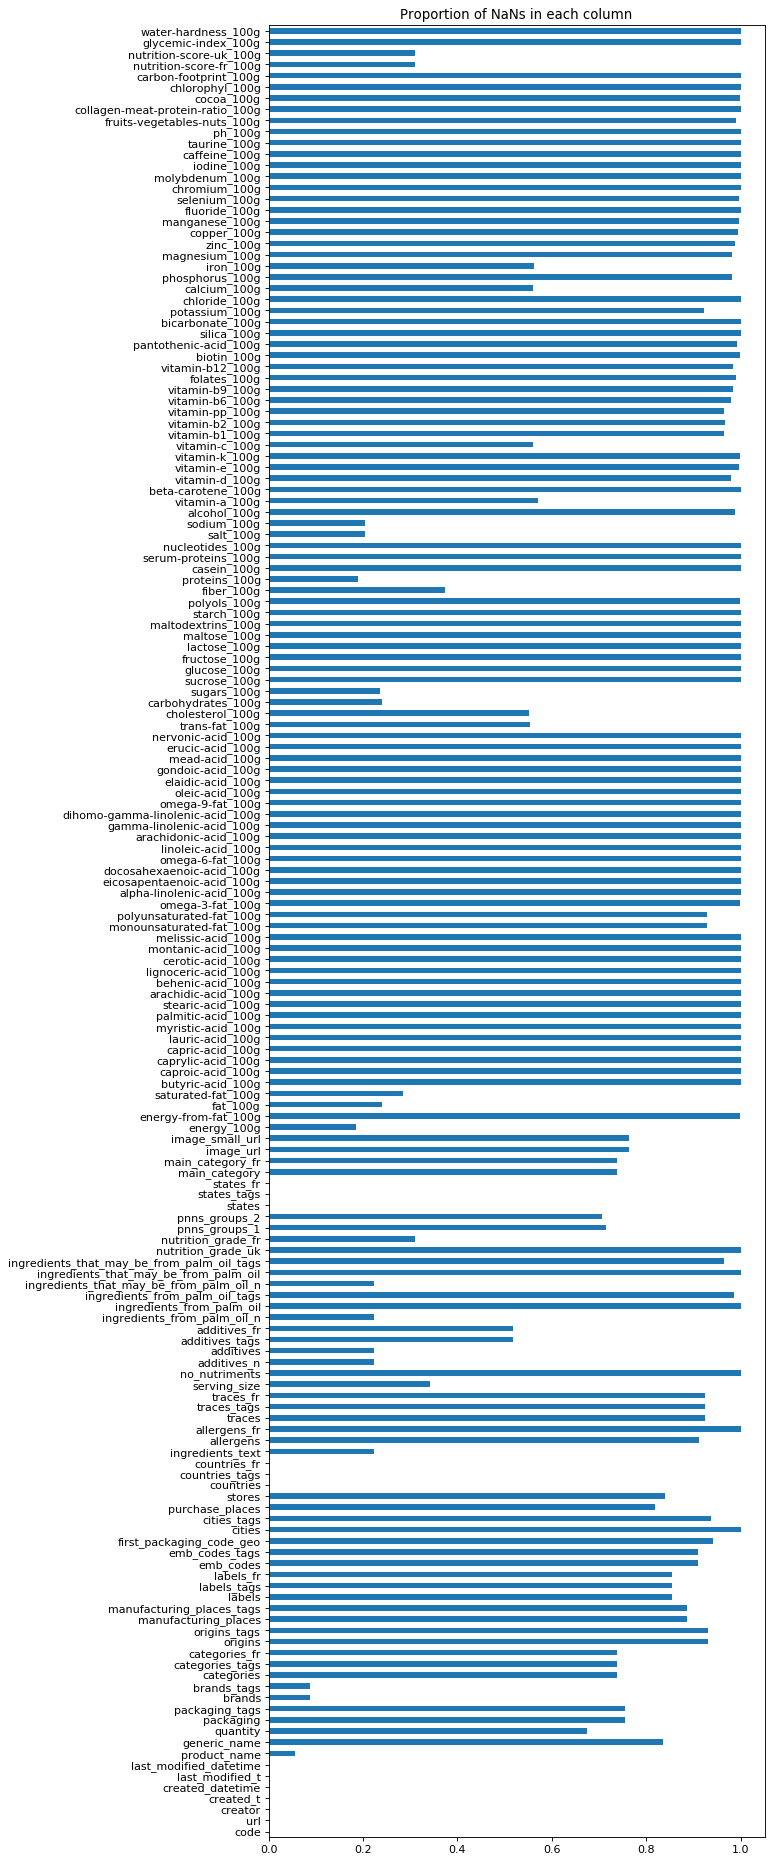

In [7]:
# affichage du nb de null pour chaque variable
plt.figure(figsize=(8, 30), dpi=80)
data.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

* Il y a beaucoup de variables avec du contenu NaN.
On supprime les colonnes qui ont plus de <b>40%</b> de valeurs vides

In [8]:
# Suppression des colonnes qui ont plus de 40% de valeurs vides
data=data[data.columns[data.isnull().mean() < 0.4]]
data.shape

(320772, 34)

=> On passe donc de **162** variables à **34** variables ce qui est déjà pas mal. On a réussi à supprimer 128 colonnes.

In [9]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

### 3.2 Filtre sur produits disponibles en France
Comme on fait une étude pour une entreprise française, on ne garde que les produits disponibles dans les commerces en France

In [10]:
# Filtre sur les produits français
data = data[data['countries_fr'] == "France"]
# on supprime la colonne countries_fr qui ne sert plus car données filtrées
del data['countries_fr']
data.shape

(94392, 33)

=> On a réduit notre dataset de **320772** lignes à **94392**

### 3.3 Suppression des lignes dont le nom de produit est vide

In [11]:
# aucun intérêt d'avoir une ligne sans connaître le nom du produit
data = data.dropna(subset=['product_name'])
data.shape

(87398, 33)

=> On a réduit notre dataset à **87398** lignes

## 4. Séléction des features

In [12]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'ingredients_text',
       'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

=> Parmis les propriétés restantes (33), je ne conserve que celles qui me semblent utiles pour l'objectif du projet.
**Les features qui me paraissent les plus pertinentes**
- product_name
- brands_tags
- nutrition_grade_fr
- energy_100g
- fat_100g
- saturated-fat_100g
- carbohydrates_100g
- sugars_100g
- fiber_100g
- proteins_100g
- salt_100g
- nutrition-score-fr_100g
- nutrition-score-uk_100g

On passe donc à 13 features

In [13]:
data = data[['product_name' , 'brands_tags' , 'nutrition_grade_fr' , 'energy_100g' , 'fat_100g' , 
             'saturated-fat_100g' , 'carbohydrates_100g' , 'sugars_100g' , 'fiber_100g' , 'proteins_100g' , 
             'salt_100g' , 'nutrition-score-fr_100g' , 'nutrition-score-uk_100g']]

### 4.1 Suppression des lignes avec beaucoup de valeurs vides
Les lignes qui contiennent plus de 70% de valeurs vides n'apportertont rien à l'analyse.
On les supprime donc du dataset

In [14]:
t = len(data.columns)*0.7
data = data.dropna(thresh=t)
data.shape

(58409, 13)

=> Nous avons maintenant 60817 produits

** ==> On arrive donc avec un dataset contenant <br/>
33  features et 60817 lignes contre
162 features et 320772 lignes à l'origine **

## 5. Dataset nettoyé

On sauvegarde les données nettoyées dans un nouveau fichier csv qui sera utilisé pour la 2ème partie du projet.

In [15]:
# sauvegarde du dataframe nettoyé dans nouveau ficher csv
data.to_csv('fr.openfoodfacts.org.products-cleaned.csv',sep="\t", index=False)